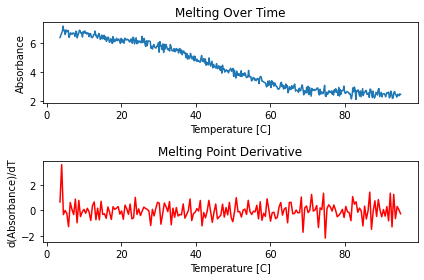

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Define file location as a string
file_location = 'C:\\Users\\alexb\\Documents\\CDmelt.xlsx'

# Load the data from an Excel file into a DataFrame object
# usecols parameter specifies which columns to read from the file
# skiprows parameter specifies how many rows to skip from the beginning
# nrows parameter specifies how many rows to read after the skipped rows
data = pd.read_excel(file_location, header=None, usecols="A:B", skiprows=16, nrows=456)

# Extract the data for the plot from columns A and B of the DataFrame
x = data.iloc[:, 0].values  # Temperature values
y = data.iloc[:, 1].values  # Absorbance values

# Create a subplot for original data
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.xlabel('Temperature [C]')  # Label x-axis
plt.ylabel('Absorbance')  # Label y-axis
plt.title('Melting Over Time')  # Add title

# Take the derivative of y with respect to x using numpy.gradient function
dy_dx = np.gradient(y, x)

# Use scipy.interpolate to create a smooth curve
# Create 200 evenly spaced values between the minimum and maximum temperature
x_smooth = np.linspace(x.min(), x.max(), 200)
spl = make_interp_spline(x, dy_dx, k=3)  # Interpolate y-values with a spline of order 3
dy_dx_smooth = spl(x_smooth)  # Get smoothed y-values at the new x-values

# Create a subplot for derivative data with smooth curve
plt.subplot(2, 1, 2)
plt.plot(x_smooth, dy_dx_smooth, color='red')
plt.xlabel('Temperature [C]')  # Label x-axis
plt.ylabel('d(Absorbance)/dT')  # Label y-axis
plt.title('Melting Point Derivative')  # Add title

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()